In [0]:


!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

!mkdir -p drive
!google-drive-ocamlfuse drive

!ls drive



In [5]:


%matplotlib inline
import keras 
import numpy as np 
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import itertools
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.layers import Dense, Flatten, Dropout
from tensorflow.python.client import device_lib
# keras library import  for Saving and loading model and weights
from keras.models import model_from_json
from keras.models import load_model
from sklearn.metrics import confusion_matrix
# import cv2



Using TensorFlow backend.


In [6]:
model = VGG16()

553467904/553467096 [==============================] - 13s 0us/step


In [7]:


model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
type(model)

keras.engine.training.Model

In [0]:


newModel = Sequential()

for layer in model.layers:
  newModel.add(layer)



In [10]:
newModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [11]:
newModel.layers.pop()

In [12]:
newModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [0]:
for layer in newModel.layers:
  layer.trainable = False

In [0]:
newModel.add(Dense(2, activation='softmax'))

In [15]:
newModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [0]:
#Compiling Model 
newModel.compile(Adam(lr=.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
train_path = 'drive/dataset/train'
test_path = 'drive/dataset/test'
valid_path = 'drive/dataset/valid'

In [18]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['original', 'spliced'], batch_size=10, shuffle=True)
test_batches =  ImageDataGenerator().flow_from_directory(test_path , target_size=(224,224), classes=['original', 'spliced'], batch_size=4)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['original', 'spliced'], batch_size=10, shuffle=True)


Found 18 images belonging to 2 classes.
Found 13 images belonging to 2 classes.
Found 11 images belonging to 2 classes.


In [25]:


newModel.fit_generator(train_batches, steps_per_epoch=182, validation_data=valid_batches, validation_steps=40, epochs=100, callbacks=callbacks_list, verbose=2)



Epoch 1/100
 - 26s - loss: 0.6865 - accuracy: 0.7363 - val_loss: 0.6968 - val_accuracy: 0.8182
Epoch 2/100


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


 - 11s - loss: 0.6765 - accuracy: 0.8694 - val_loss: 0.6797 - val_accuracy: 0.8182
Epoch 3/100
 - 11s - loss: 0.6666 - accuracy: 0.9408 - val_loss: 0.7059 - val_accuracy: 0.6364
Epoch 4/100
 - 11s - loss: 0.6568 - accuracy: 0.9444 - val_loss: 0.6736 - val_accuracy: 0.6364
Epoch 5/100
 - 11s - loss: 0.6474 - accuracy: 0.9463 - val_loss: 0.7272 - val_accuracy: 0.6364
Epoch 6/100
 - 11s - loss: 0.6384 - accuracy: 1.0000 - val_loss: 0.6719 - val_accuracy: 0.6364
Epoch 7/100
 - 11s - loss: 0.6293 - accuracy: 1.0000 - val_loss: 0.6687 - val_accuracy: 0.5455
Epoch 8/100
 - 11s - loss: 0.6205 - accuracy: 1.0000 - val_loss: 0.6612 - val_accuracy: 0.5455
Epoch 9/100
 - 11s - loss: 0.6116 - accuracy: 1.0000 - val_loss: 0.6514 - val_accuracy: 0.5455
Epoch 10/100
 - 12s - loss: 0.6032 - accuracy: 1.0000 - val_loss: 0.7615 - val_accuracy: 0.5455
Epoch 11/100
 - 11s - loss: 0.5945 - accuracy: 1.0000 - val_loss: 0.6547 - val_accuracy: 0.5455
Epoch 12/100
 - 11s - loss: 0.5862 - accuracy: 1.0000 - val_

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [27]:
newModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [28]:
test_imgs, test_labels = next(test_batches)


test_labels = test_labels[:,0]

test_labels

array([1., 0., 1., 1.], dtype=float32)

In [0]:
predections = newModel.predict_generator(test_batches, steps=1, verbose=0)

In [30]:
print (test_labels)
print (np.round(predections[:,0]))

cn =  confusion_matrix(test_labels, np.round(predections[:,0]))

[1. 0. 1. 1.]
[1. 0. 1. 1.]


Confusion matrix, without normalization
[[1 0]
 [0 3]]


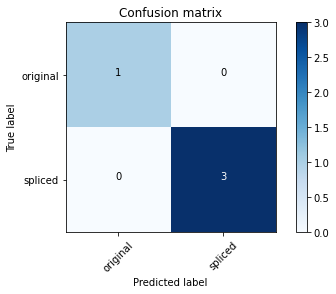

In [31]:
cn_plot_labels = ['original', 'spliced']


plot_confusion_matrix(cn , cn_plot_labels, title='Confusion matrix')